In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ode_solver(f, t0, y0, yp0, t_end, h):
    """
    Solves a second-order ODE using the Runge-Kutta method.

    Parameters:
    - f: Function f(t, y, yp) representing the second-order ODE: y'' = f(t, y, y').
    - t0: Initial time.
    - y0: Initial condition for y.
    - yp0: Initial condition for y'.
    - t_end: Final time.
    - h: Time step.

    Returns:
    - t: Array of time values.
    - y: Array of y values (solution).
    - yp: Array of y' values (solution).
    """
    # Number of steps
    n_steps = int((t_end - t0) / h) + 1
    
    # Initialize arrays for time, y, and y'
    t = np.linspace(t0, t_end, n_steps)
    y = np.zeros(n_steps)
    yp = np.zeros(n_steps)
    
    # Set initial conditions
    y[0] = y0
    yp[0] = yp0
    
    # Iterate using Runge-Kutta method
    for i in range(1, n_steps):
        # Current values
        ti = t[i - 1]
        yi = y[i - 1]
        ypi = yp[i - 1]
        
        # Compute k values for Runge-Kutta
        k1y = h * ypi
        k1yp = h * f(ti, yi, ypi)
        
        k2y = h * (ypi + 0.5 * k1yp)
        k2yp = h * f(ti + 0.5 * h, yi + 0.5 * k1y, ypi + 0.5 * k1yp)
        
        k3y = h * (ypi + 0.5 * k2yp)
        k3yp = h * f(ti + 0.5 * h, yi + 0.5 * k2y, ypi + 0.5 * k2yp)
        
        k4y = h * (ypi + k3yp)
        k4yp = h * f(ti + h, yi + k3y, ypi + k3yp)
        
        # Update y and yp
        y[i] = yi + (k1y + 2 * k2y + 2 * k3y + k4y) / 6
        yp[i] = ypi + (k1yp + 2 * k2yp + 2 * k3yp + k4yp) / 6
    
    return t, y, yp

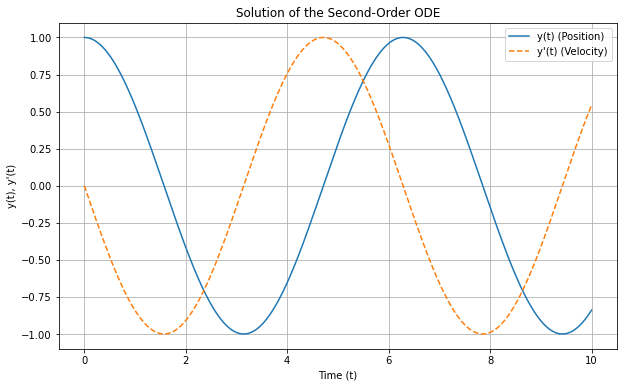

In [2]:
# Example usage
if __name__ == "__main__":
    # Define the second-order ODE y'' = -k * y (simple harmonic oscillator)
    k = 1.0  # Spring constant
    def f(t, y, yp):
        return -k * y

    # Initial conditions
    t0 = 0.0
    y0 = 1.0  # Initial position
    yp0 = 0.0  # Initial velocity
    t_end = 10.0
    h = 0.01

    # Solve the ODE
    t, y, yp = ode_solver(f, t0, y0, yp0, t_end, h)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, label="y(t) (Position)")
    plt.plot(t, yp, label="y'(t) (Velocity)", linestyle="--")
    plt.xlabel("Time (t)")
    plt.ylabel("y(t), y'(t)")
    plt.title("Solution of the Second-Order ODE")
    plt.legend()
    plt.grid()
    plt.show()
